# <center> Практика

age — возраст

sex — пол (1 - мужчина, 0 - женщина)

cp — тип боли в груди (4 значения)

trestbps — артериальное давление в покое

chol — холестерин сыворотки в мг/дл

fbs — уровень сахара в крови натощак > 120 мг/дл

restecg — результаты электрокардиографии в покое (значения 0,1,2)

thalach — достигнута максимальная частота сердечных сокращений

exang — стенокардия, вызванная физической нагрузкой

oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя

slope — наклон пикового сегмента ST при нагрузке

ca — количество крупных сосудов (0-3), окрашенных при флюроскопии

thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [32]:
# Импорты

import pandas as pd
import seaborn as sns
import category_encoders as ce
import warnings
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

warnings.filterwarnings('ignore')

In [33]:
heart = pd.read_csv('data/heart.csv')

heart.info()
heart.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
#Задание 8.1

heart['old'] = heart['age'].apply(lambda x: 1 if x>60 else 0)
display(heart['old'].sum())

#Задание 8.2
def trestbps_mean_conf(row):
    if row['sex'] == 1:
        if row['age'] <= 20:
            return 123
        elif row['age'] > 20 and row['age'] <= 30:
            return 126
        elif row['age'] > 30 and row['age'] <= 40:
            return 129
        elif row['age'] > 40 and row['age'] <= 50:
            return 135
        else:
            return 142
    else:
        if row['age'] <= 20:
            return 116
        elif row['age'] > 20 and row['age'] <= 30:
            return 120
        elif row['age'] > 30 and row['age'] <= 40:
            return 127
        elif row['age'] > 40 and row['age'] <= 50:
            return 137
        elif row['age'] > 50 and row['age'] <= 60:
            return 144
        else:
            return 159
        
heart['trestbps_mean'] = heart.apply(lambda x: trestbps_mean_conf(x), axis=1)
display(heart['trestbps_mean'][300])  #142

#Задание 8.5

encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
heart = pd.concat([heart, (encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']]))], axis=1)
heart = heart.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1)
display(heart.info())  #30

79

142

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    int64  
 11  cp_1           303 non-null    int64  
 12  cp_2           303 non-null    int64  
 13  cp_3           303 non-null    int64  
 14  cp_4           303 non-null    int64  
 15  restecg_1      303 non-null    int64  
 16  restecg_2      303 non-null    int64  
 17  restecg_3      303 non-null    int64  
 18  slope_1   

None

0.816232

<Axes: >

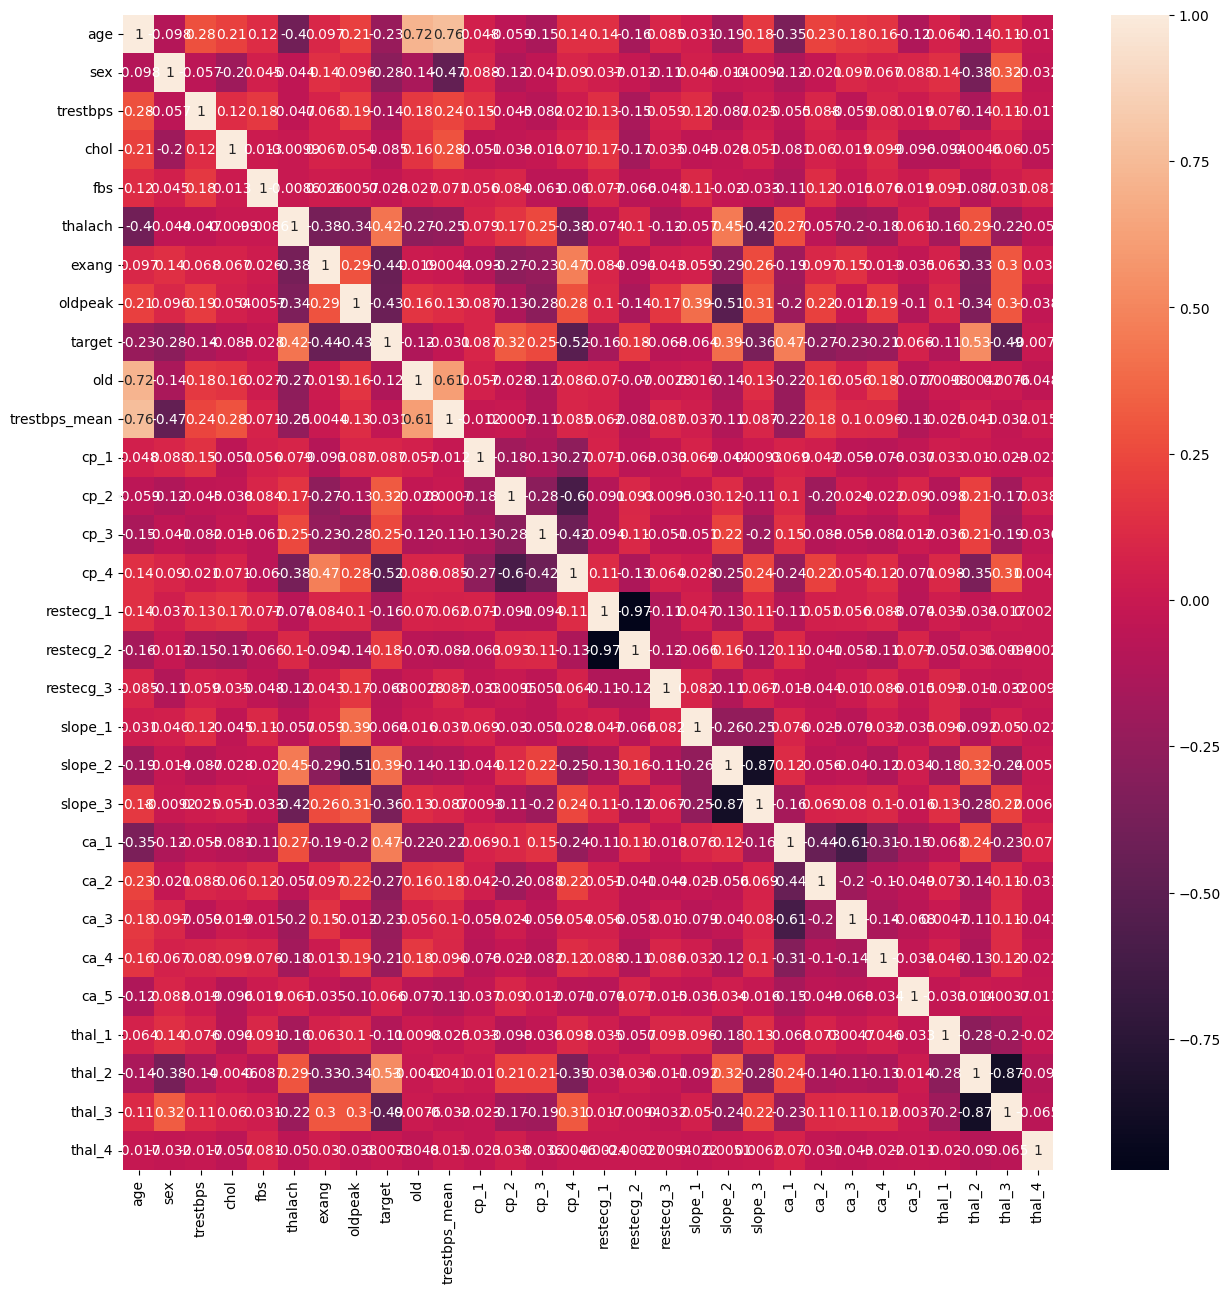

In [35]:
#Задание 8.6

normalizer = pp.RobustScaler()
robusted_heart = normalizer.fit_transform(heart)
robusted_heart = pd.DataFrame(robusted_heart, columns=heart.columns)
display(round(robusted_heart['chol'].std(), 6))   #0.816232


#Задание 8.7

plt.figure(figsize=(15,15))
sns.heatmap(robusted_heart.corr(numeric_only=True), annot=True)
#По-хорошему, убрать бы всё, у чего коррелируемость более +-(0,7)

In [36]:
robusted_heart['chol'].describe()

count    303.000000
mean       0.098646
std        0.816232
min       -1.795276
25%       -0.456693
50%        0.000000
75%        0.543307
max        5.102362
Name: chol, dtype: float64